# CREDIT CARD FRAUD DETECTION

# Install the required packages

In [3]:
!pip install numpy
!pip install pandas 
!pip install matplotlib

# Import all the packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns


# Read the csv file and load it in a variable

In [6]:
data_df = pd.read_csv("C://Users//Dell//OneDrive//Desktop//New folder//creditcard.csv")

In [7]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data_df.shape

(284807, 31)

In [9]:
data_df[['Amount', 'Time', 'Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


# Check for nan values in the dataset

In [10]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [12]:
data_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Percentage of total not fraud transaction

In [9]:
nfcount = 0
notfraud = data_df['Class']
for i in range(len(notfraud)):
    if notfraud[i] ==0:
        nfcount = nfcount+1

nfcount
per_nf = (nfcount/len(notfraud))*100
print("Percentage of total not fraud transaction in the dataset:", per_nf)

Percentage of total not fraud transaction in the dataset: 99.82725143693798


# Percentage of total fraud transaction

In [10]:
fcount = 0
Fraud = data_df['Class']
for i in range(len(Fraud)):
    if Fraud[i] == 1:
        fcount = fcount+1

fcount
per_f = (fcount/len(Fraud))*100
print("Percentage of total fraud transaction in the dataset:", per_f)

Percentage of total fraud transaction in the dataset: 0.1727485630620034


In [11]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = Fraud
plot_data['Genuine Transaction'] = notfraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<AxesSubplot:title={'center':'Bar plot for Fraud v/s Genuine Transaction'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

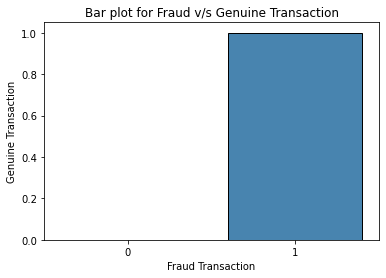

In [12]:
plt.title("Bar plot for Fraud v/s Genuine Transaction")
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette = 'Blues', edgecolor = 'black')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


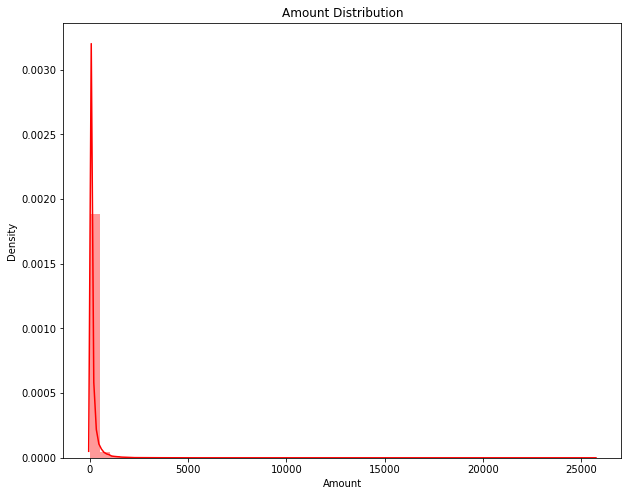

In [13]:
 plt.figure(figsize = (10,8), )
plt.title('Amount Distribution')

sns.distplot(data_df['Amount'], color = 'red');

# Check for the Outliers in the dataset

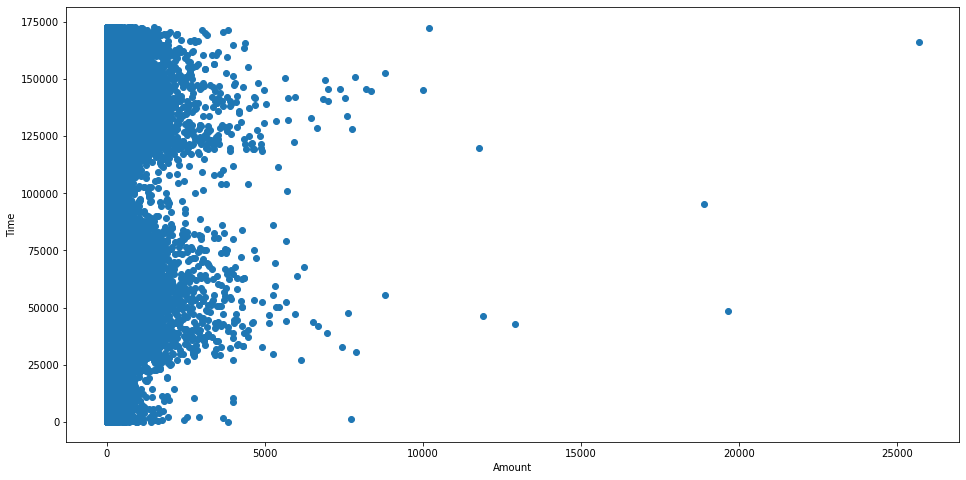

In [14]:
fig, ax = plt.subplots(figsize = (16,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

# Correlation matrix

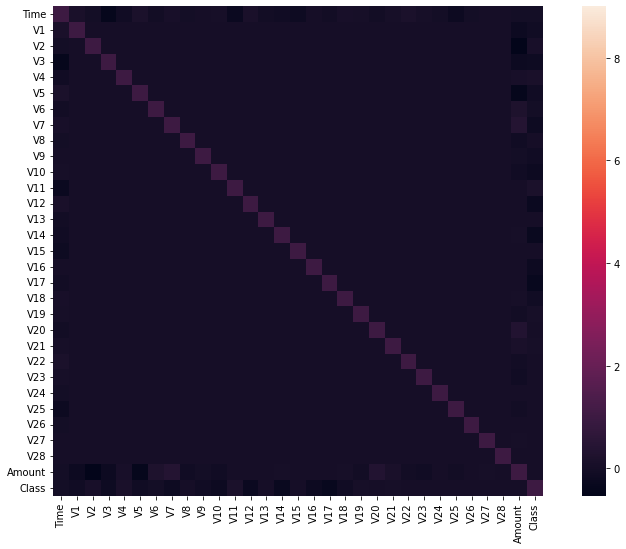

In [15]:
correlation_matrics = data_df.corr()
fig = plt.figure(figsize = (14,9))
sns.heatmap(correlation_matrics, vmax = 9, square = True)
plt.show()

# To start with modelling first we need to spilit the dataset

80% - 80% of the data will use to train the model

20% - 20% to test/validate the model


In [16]:
x = data_df.drop(['Class'], axis = 1)  #drop the target value
y = data_df['Class']
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Apply Logistic Regression to find the accuracy

In [17]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain, ytrain)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = logisticreg.predict(xtest)
accuracy = logisticreg.score(xtest, ytest)

# Confusion Matrix

In [19]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56830    34]
 [   43    55]]


# Accuracy Calculation

In [20]:
print("Accuracy score of the logistic regression model :" , accuracy*100,'%')

Accuracy score of the logistic regression model : 99.86482216214318 %
